In [1]:
from sklearn.datasets import make_circles
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
n_samples = 1000



X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

%matplotlib inline
#plt.scatter(X,y)
#plt.showX
X.shape, y.shape



((1000, 2), (1000,))

In [3]:
X.shape

(1000, 2)

In [4]:
y.shape

(1000,)

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


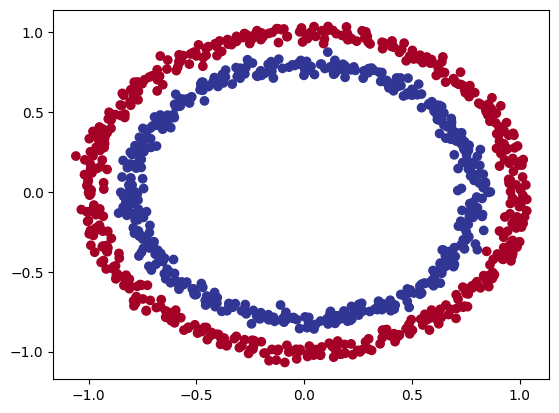

In [6]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [7]:
X.dtype

dtype('float64')

In [8]:
y.dtype

dtype('int64')

In [9]:
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='sigmoid'),
      tf.keras.layers.Dense(100, activation='tanh'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, gradient_accumulation_steps=None),
                metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

history = model_1.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5227 - loss: 0.6983
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5262 - loss: 0.6926
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5117 - loss: 0.6918
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4937 - loss: 0.6977
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5587 - loss: 0.6913
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5043 - loss: 0.6914
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5907 - loss: 0.6897
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5250 - loss: 0.6891
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6265 - loss: 0.6880
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5763 - loss: 0.6886
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5220 - loss: 0.6878
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accu

In [10]:
y_preds = model_1.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
y_test.shape, y_preds.shape

((300,), (300, 1))

In [13]:
y_preds

array([[9.9884480e-01],
       [4.2683050e-02],
       [9.9882227e-01],
       [5.6339954e-03],
       [9.3927294e-01],
       [9.4551325e-01],
       [2.3302599e-03],
       [9.4043161e-04],
       [9.9233598e-01],
       [1.9004999e-02],
       [3.0735731e-01],
       [9.9965554e-01],
       [4.8053009e-04],
       [9.8811448e-01],
       [7.3420271e-02],
       [9.9928653e-01],
       [9.9822766e-01],
       [1.0251159e-02],
       [9.9707168e-01],
       [7.7836119e-02],
       [1.1520152e-02],
       [1.1485082e-03],
       [9.9637651e-01],
       [7.7305135e-04],
       [1.4375059e-02],
       [1.9119477e-02],
       [8.7408479e-03],
       [3.8126521e-03],
       [1.8300952e-03],
       [9.9949068e-01],
       [9.9851173e-01],
       [7.2487895e-03],
       [1.2177798e-01],
       [9.9467528e-01],
       [1.2149777e-02],
       [9.9646205e-01],
       [8.7551278e-01],
       [9.9374437e-01],
       [9.9127954e-01],
       [9.9596363e-01],
       [9.8926789e-01],
       [9.901450

In [14]:
def tensers(y_preds):
    y_preds = tf.squeeze(tf.round(y_preds))
    return y_preds

In [15]:
cm = confusion_matrix(y_test, tensers(y_preds))

In [16]:
cm

array([[156,   0],
       [  0, 144]])

In [17]:
eva = model_1.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0241  


In [18]:
labels = ['Classe0', 'Classe1']

In [19]:
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

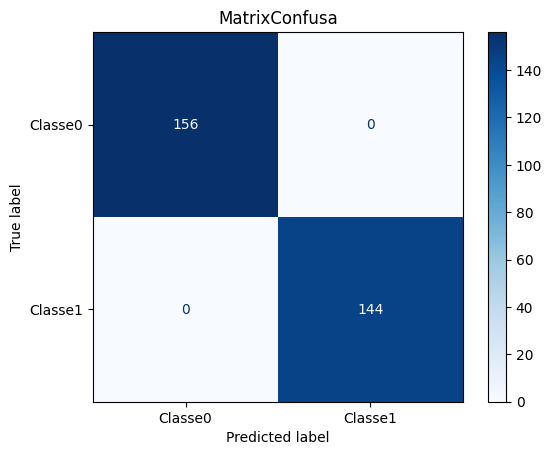

In [20]:
disp.plot(cmap=plt.cm.Blues)
plt.title('MatrixConfusa')
plt.show()

In [21]:
from sklearn.metrics import f1_score, fbeta_score

In [22]:
y_preds = np.round(y_preds)
y_test = np.round(y_test)

In [23]:
f2 = fbeta_score(y_test, y_preds, beta=2, average='micro')
f2

1.0

In [24]:
model_1.save('meu_modelo_CNN.h5')

In [25]:
history.history

{'accuracy': [0.5099999904632568,
  0.5057142972946167,
  0.49142858386039734,
  0.5142857432365417,
  0.5185714364051819,
  0.4957142770290375,
  0.5614285469055176,
  0.5099999904632568,
  0.581428587436676,
  0.5614285469055176,
  0.5357142686843872,
  0.558571457862854,
  0.5628571510314941,
  0.6342856884002686,
  0.5514285564422607,
  0.6442857384681702,
  0.5714285969734192,
  0.5928571224212646,
  0.6442857384681702,
  0.6957142949104309,
  0.7114285826683044,
  0.6628571152687073,
  0.668571412563324,
  0.5942857265472412,
  0.7914285659790039,
  0.7571428418159485,
  0.6114285588264465,
  0.7028571367263794,
  0.7257142663002014,
  0.7771428823471069,
  0.7300000190734863,
  0.7257142663002014,
  0.8442857265472412,
  0.7357142567634583,
  0.7128571271896362,
  0.7114285826683044,
  0.8728571534156799,
  0.9014285802841187,
  0.8100000023841858,
  0.8357142806053162,
  0.7028571367263794,
  0.9057142734527588,
  0.8114285469055176,
  0.9057142734527588,
  0.9214285612106323,


Text(0.5, 0, 'epochs')

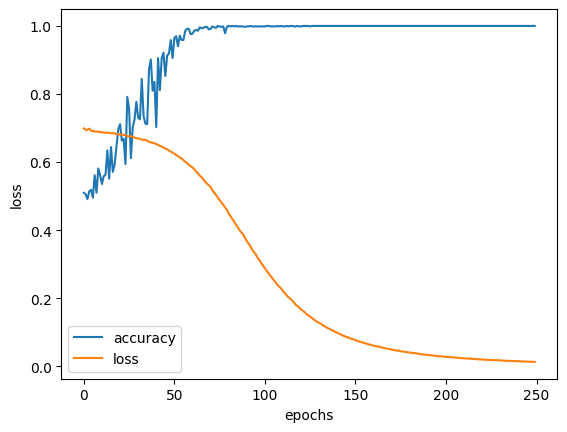

In [26]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [27]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, gradient_accumulation_steps=None),
                metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5063 - loss: 0.6987 - learning_rate: 1.0000e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6952 - learning_rate: 1.1220e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6932 - learning_rate: 1.2589e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.6920 - learning_rate: 1.4125e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5198 - loss: 0.6909 - learning_rate: 1.5849e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5685 - loss: 0.6894 - learning_rate: 1.7783e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.6873 - learning_rate: 1.9953e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.6845 - learning_rate: 2.2387e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.6806 - learning_

Text(0.5, 0, 'epochs')

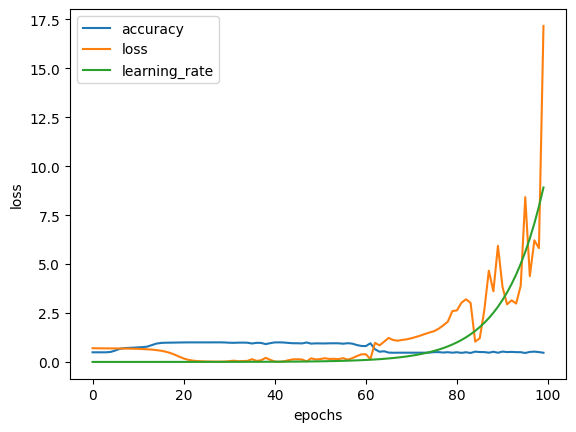

In [28]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [29]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, gradient_accumulation_steps=None),
                metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5013 - loss: 0.7423
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 0.7066 
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.6663 
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.5308 
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9358 - loss: 0.2788
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9519 - loss: 0.1408
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9712 - loss: 0.0892
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0651
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0268
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9973 - loss: 0.0192
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0328
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9839 -

In [30]:
eva_3 = model_3.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0155  


In [31]:
y_pred_3 = model_3.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [32]:
cm_3 = confusion_matrix(y_test,tensers(y_pred_3))


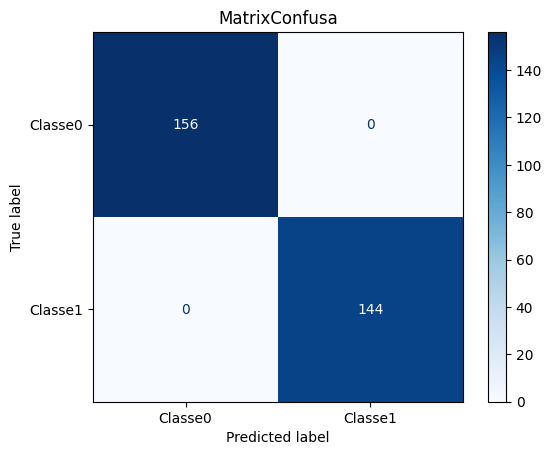

In [33]:
disp_3 = ConfusionMatrixDisplay(cm_3, display_labels=labels)
disp_3.plot(cmap=plt.cm.Blues)
plt.title('MatrixConfusa')
plt.show()

In [35]:
y_preds_3 = np.round(y_pred_3)
y_test = np.round(y_test)

f2 = fbeta_score(y_test, y_preds_3, beta=2, average='micro')
f2

1.0